In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.axes_grid1.parasite_axes import HostAxes

In [2]:
tab = pd.read_pickle('gaia_xstars_pm_r98_200pc_lkh10_woutdup.pkl') #read file from pickle

In [86]:
#tab = tab.sort_values('Lx', ascending=False) # sort value by X-ray luminosity !!!already done

In [91]:
#tab.to_csv('gaia_xstars_pm_r98_200pc_lkh10_woutdup.gzip', index_label=False) # save in gzip csv for Eugenia and Irek

In [87]:
x = tab.bp_rp # choose column X from table
y = tab.MG # choose column Y from table

In [88]:
d50 = tab['dist_pc'] <= 50 # find objects closer then 50 pc
d100 = tab['dist_pc'] <= 100 # find objects closer then 100 pc

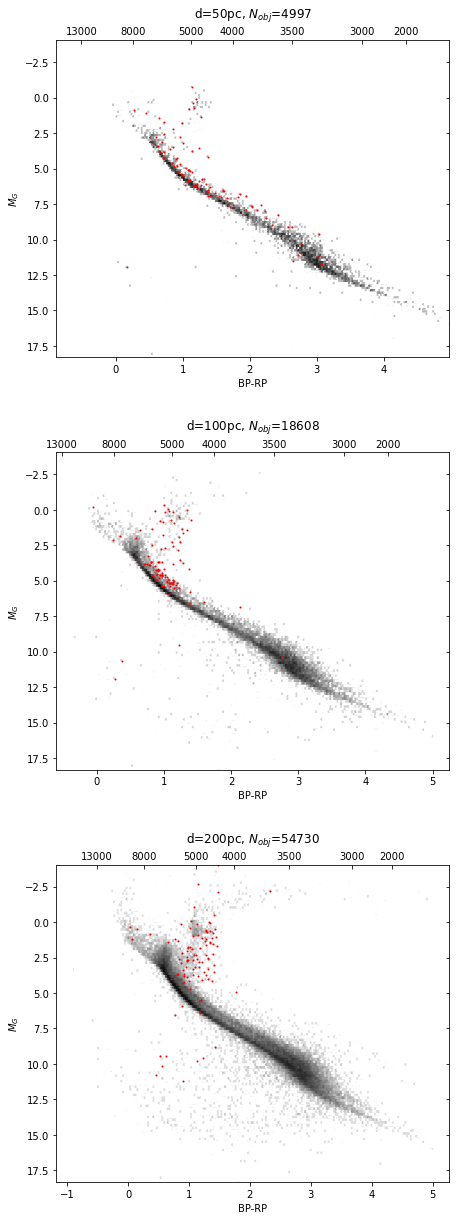

In [90]:
xmin = x.min() # margins of the plot
xmax = x.max()
ymin = y.min()
ymax = y.max()


fig, axs = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(6.5, 21),subplot_kw={'axes_class':HostAxes})
fig.subplots_adjust(hspace=0.3, left=0.15, right=0.99)
ax = axs[0]

hb = ax.hexbin(x[d50], y[d50], gridsize=200, bins='log', cmap='gray_r') # see info here 
# https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html#sphx-glr-gallery-statistics-hexbin-demo-py
# and in help
ax.plot(x[d50].iloc[:100],y[d50].iloc[:100],'ro', markersize = 1)
ax.set(xlim=(xmin, xmax), ylim=(ymax, ymin), xlabel = 'BP-RP',ylabel = '$M_G$')
ax.set_title("d=50pc, $N_{obj}$=4997", y=1.05)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([4.34, 3.68, 2.64, 1.745,1.117,.2575,-.5133])#,-0.1
ax2.set_xticklabels([2000,3000,3500,4000,5000,8000,13000])#,10000
ax2.tick_params(direction='in')
ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

#cb = fig.colorbar(hb, ax=ax2)
#cb.set_label('log10(N)')


ax = axs[1]
hb = ax.hexbin(x[d100], y[d100], gridsize=200, bins='log', cmap='gray_r')
ax.plot(x[d100].iloc[:100],y[d100].iloc[:100],'ro', markersize = 1)
ax.set(xlabel = 'BP-RP',ylabel = '$M_G$')
ax.set_title("d=100pc, $N_{obj}$=18608", y =1.05)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis

ax2.set_xticks([4.34, 3.68, 2.64, 1.745,1.117,.2575,-.5133])#,-0.1
ax2.set_xticklabels([2000,3000,3500,4000,5000,8000,13000])#,10000
ax2.tick_params(direction='in')
ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

#cb = fig.colorbar(hb, ax=ax2)
#cb.set_label('log10(N)')

ax = axs[2]
hb = ax.hexbin(x, y, gridsize=200, bins='log', cmap='gray_r')
ax.plot(x.iloc[:100],y.iloc[:100],'ro', markersize = 1)
ax.set(xlabel = 'BP-RP',ylabel = '$M_G$')
ax.set_title("d=200pc, $N_{obj}$=54730",y=1.05)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([4.34, 3.68, 2.64, 1.745,1.117,.2575,-.5133])#,-0.1
ax2.set_xticklabels([2000,3000,3500,4000,5000,8000,13000])#,10000
ax2.tick_params(direction='in')
ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

#cb = fig.colorbar(hb, ax=ax2)
#cb.set_label('log10(N)')


plt.savefig('HRD_by_dist_100bright.pdf')